In [5]:
import pandas as pd

store_sales = pd.read_csv('train.csv')
store_sales.head(20)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [7]:
# PRE PRECESSING OF THE GIVEN DATA IN ORDER TO PROVIDE IT TO MODEL FOR TRAINING
import pandas as pd

# Load data from CSV file
# file_path = 'your_dataset.csv'  # Replace with your CSV file path
data = pd.read_csv('train.csv')

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract numeric features from the 'date' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original 'date' column
data = data.drop(columns=['date'])

# Encode categorical columns if they are not numeric (e.g., store and item)
data['store'] = data['store'].astype('category').cat.codes
data['item'] = data['item'].astype('category').cat.codes

# Define features (X) and target (y)
X = data.drop(columns=['sales'])  # Features
y = data['sales']                 # Target variable

# Save the processed data to a new CSV file
processed_file_path = 'processed_dataset.csv'
data.to_csv(processed_file_path, index=False)

print("Data preprocessing complete. Processed data saved to", processed_file_path)


Data preprocessing complete. Processed data saved to processed_dataset.csv


In [9]:
# DISPLAYING PROCESSED DATA
import pandas as pd

store_sales = pd.read_csv('processed_dataset.csv') #in processed_dataset.csv I have processed data
store_sales.head(20)

,store,item,sales,year,month,day,day_of_week,is_weekend
0,0,0,13,2013,1,1,1,0
1,0,0,11,2013,1,2,2,0
2,0,0,14,2013,1,3,3,0
3,0,0,13,2013,1,4,4,0
4,0,0,10,2013,1,5,5,1
5,0,0,12,2013,1,6,6,1
6,0,0,10,2013,1,7,0,0
7,0,0,9,2013,1,8,1,0
8,0,0,12,2013,1,9,2,0
9,0,0,9,2013,1,10,3,0


In [1]:
################################FINAL CHECKING CODE##################################
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data from the CSV file
# Replace 'your_file.csv' with the actual path to your file
data = pd.read_csv('processed_dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['sales'])  # All columns except 'sales'
y = data['sales']  # The 'sales' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor instance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predicted values:", y_pred)


Mean Squared Error: 66.37667095564075
Predicted values: [16.55 13.35 90.69 ... 99.32 82.14 96.65]


In [17]:
################################REDUCING COMPUTATIONAL POWER OF FINALL CODE##################################
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data from the CSV file
# Replace 'your_file.csv' with the actual path to your file
data = pd.read_csv('processed_dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['sales'])  # All columns except 'sales'
y = data['sales']  # The 'sales' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor instance
model = RandomForestRegressor(n_estimators=1,max_depth=1, random_state=42)

# Train (fit) the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predicted values:", y_pred)


Mean Squared Error: 780.8235308107697
Predicted values: [54.61785077 31.49655621 31.49655621 ... 54.61785077 54.61785077
 54.61785077]


In [ ]:
############################## RANDOM FOREST VANILA IMPLEMENTATION  ####################################3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        # Builds the decision tree based on the input features X and target values

        #Calls _grow_tree to recursively construct the tree.
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        # Uses _predict_row for each sample in X to traverse the tree and return a prediction
        return np.array([self._predict_row(row, self.tree) for row in X])

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        # Stopping Conditions: Maximum depth is reached OR Not enough samples to split
        if depth >= self.max_depth or num_samples < self.min_samples_split:
            # returns a leaf node with the average of y.
            return {"value": np.mean(y)}

        # Finds the best split using _find_best_split.
        best_split = self._find_best_split(X, y, num_features)
        if not best_split:
            return {"value": np.mean(y)}

        # Divides the data into left and right subtrees based on the split and recursively grows each subtree.
        left_indices, right_indices = best_split["indices"]
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return {"feature": best_split["feature"], 
                "threshold": best_split["threshold"], 
                "left": left_subtree, 
                "right": right_subtree}

    def _find_best_split(self, X, y, num_features):
        # Identifies the optimal feature and threshold to split the data for minimizing the error
        best_split = None
        min_mse = float("inf")

        # Iterates over each feature and potential thresholds in X
        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                
                # Computes the Mean Squared Error (MSE) for each potential split using _calculate_mse
                mse = self._calculate_mse(y[left_indices], y[right_indices])
                if mse < min_mse:
                    min_mse = mse
                    best_split = {
                        "feature": feature_idx,
                        "threshold": threshold,
                        "indices": (left_indices, right_indices),
                    }
        return best_split

    def _calculate_mse(self, left, right):
        left_error = np.var(left) * len(left) if len(left) > 0 else 0
        right_error = np.var(right) * len(right) if len(right) > 0 else 0
        return (left_error + right_error) / (len(left) + len(right))

    def _predict_row(self, row, tree):
    # Traverses the tree to make a prediction for a single input row
        if "value" in tree:
            return tree["value"]
        feature = tree["feature"]
        threshold = tree["threshold"]
        if row[feature] <= threshold:
            return self._predict_row(row, tree["left"])
        return self._predict_row(row, tree["right"])


class RandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        self.random_states = np.random.RandomState(random_state) if random_state else np.random

    def fit(self, X, y):
        # Trains multiple decision trees using bootstrapped samples
        self.trees = []
        for _ in range(self.n_estimators):
            # Generates a bootstrap sample using _bootstrap_sample
            bootstrap_X, bootstrap_y = self._bootstrap_sample(X, y) 
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            # Trains a DecisionTreeRegressor on this sample.
            tree.fit(bootstrap_X, bootstrap_y) 
            # Appends the trained tree to self.trees
            self.trees.append(tree) 

    def predict(self, X):
        # Predicts output by averaging predictions from all trees.
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)

    def _bootstrap_sample(self, X, y):
        #  Creates a bootstrap sample (random sampling with replacement)
        n_samples = X.shape[0]
        indices = self.random_states.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]


# Load data from the CSV file
data = pd.read_csv('processed_dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['sales']).values  # Convert to NumPy array
y = data['sales'].values  # Convert to NumPy array

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor instance
model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)

# Train (fit) the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

# Visualize true vs. predicted values for the first 20 results
plt.figure(figsize=(8, 5))
plt.plot(range(20), y_test[:20], color='green', marker='o', label='True Values', linewidth=2)
plt.plot(range(20), y_pred[:20], color='blue', marker='x', linestyle='--', label='Predicted Values', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.title('Comparison of True and Predicted Sales (First 20 Results)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 66.37667095564075
Mean Absolute Error: 6.258035432639651
R² Score: 0.9198539521665398


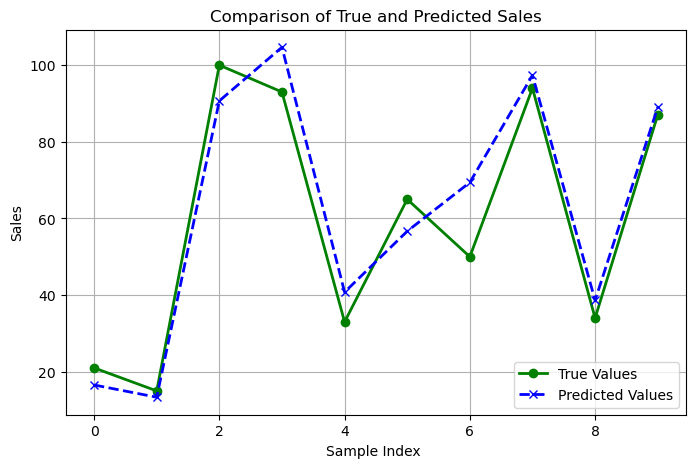

In [38]:
######################################    FINAL       #########################################
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data from the CSV file
# Replace 'your_file.csv' with the actual path to your file
data = pd.read_csv('processed_dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['sales'])  # All columns except 'sales'
y = data['sales']  # The 'sales' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor instance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


# Visualize true vs. predicted values for the first 5 results with a line plot
plt.figure(figsize=(8, 5))

# Plot true values with a green line
length = 10
plt.plot(range(length), y_test[:length].values, color='green', marker='o', label='True Values', linewidth=2)

# Plot predicted values with a blue dashed line
plt.plot(range(length), y_pred[:length], color='blue', marker='x', linestyle='--', label='Predicted Values', linewidth=2)

# Add labels, legend, and title
plt.xlabel('Sample Index ')
plt.ylabel('Sales')
plt.title('Comparison of True and Predicted Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

